### 匯入函數庫



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

### 前處理 & EDA

In [5]:
#visualize on iris
iris = datasets.load_iris()
x = iris.data
y = iris.target
feature_names = iris.feature_names
n = 8 #Nan number
[xidx,yidx]=[np.random.choice(x.shape[0],n),np.random.choice(x.shape[1],n)]#Nan index
for i in range(n) :
    x[xidx[i],yidx[i]]=np.nan
df = pd.DataFrame(x,columns=feature_names)
df.head()
###missing value
null = df.isnull().sum()
print('number of missing value')
print(null)
#fill NaN with mean
for j in df.columns:
    mean = np.around(np.mean(df[j]),3)
    df[j].fillna(mean,inplace = True)
    print('fill Nan in %s with mean %.3f (cm)'%(j,mean))
df.head()
X = df.to_numpy()

number of missing value
sepal length (cm)    2
sepal width (cm)     0
petal length (cm)    4
petal width (cm)     2
dtype: int64
fill Nan in sepal length (cm) with mean 5.836 (cm)
fill Nan in sepal width (cm) with mean 3.057 (cm)
fill Nan in petal length (cm) with mean 3.731 (cm)
fill Nan in petal width (cm) with mean 1.186 (cm)


### Feature selection

In [6]:
###feature selection
from sklearn.feature_selection import SelectKBest, chi2
subset_slec = SelectKBest(chi2, k=3).fit(X,y)

df_subset = pd.DataFrame(subset_slec.scores_.transpose(),index=feature_names,columns = ['chi-score'])
print(df_subset)


                    chi-score
sepal length (cm)   10.315084
sepal width (cm)     3.710728
petal length (cm)  114.923223
petal width (cm)    65.031492


### PCA

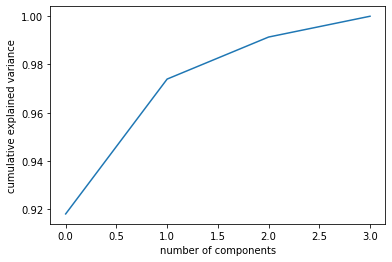

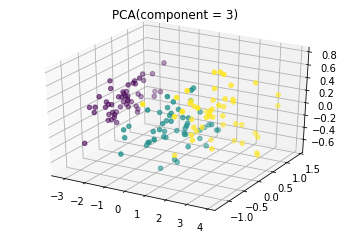

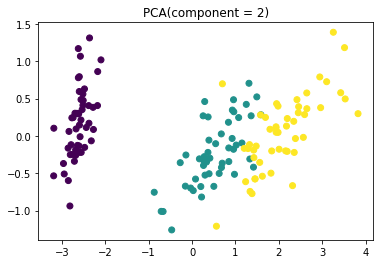

In [7]:
# =============================================================================
# PCA
# =============================================================================
#%%
from sklearn.decomposition import PCA
pca_iris = PCA().fit(X)
plt.figure()
plt.plot(np.cumsum(pca_iris.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

pca_iris3 = PCA(n_components = 3)
pca_iris3_feature = pca_iris3.fit_transform(X)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('PCA(component = 3)')
ax.scatter(pca_iris3_feature[:,0],pca_iris3_feature[:,1], 
           pca_iris3_feature[:,2], c=iris.target)
plt.show()

pca_iris2 = PCA(n_components = 2)
pca_iris2_feature = pca_iris2.fit_transform(X)
plt.figure()
plt.title('PCA(component = 2)')
plt.scatter(pca_iris2_feature[:,0],pca_iris2_feature[:,1],c=iris.target)
plt.show()

### LDA

[0.99014829 0.00985171]


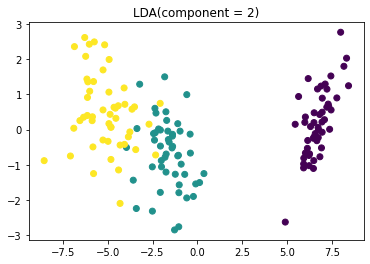

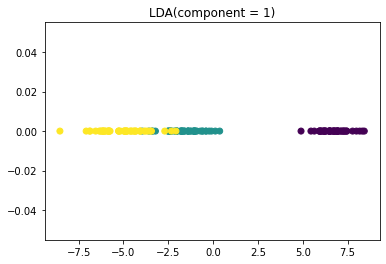

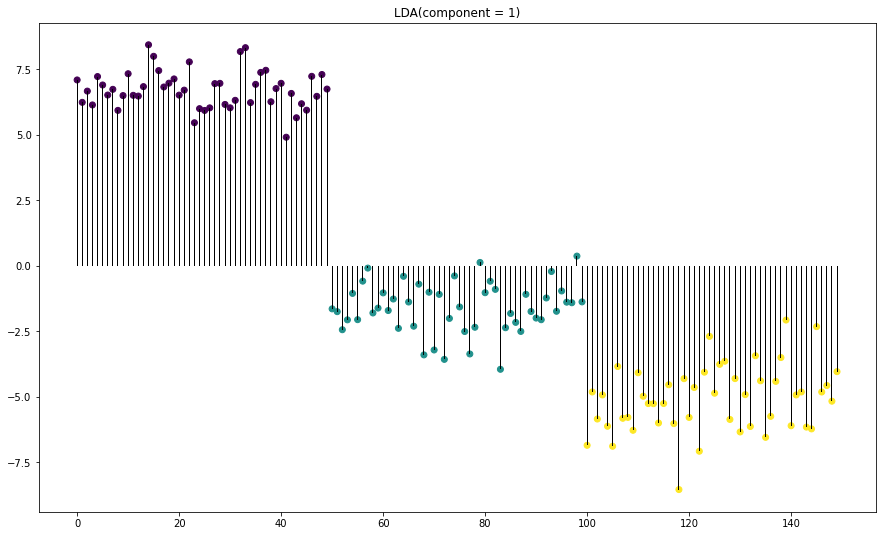

In [8]:
# =============================================================================
# ###LDA
# =============================================================================
#%%
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda_iris = lda.fit(X, y)
print(lda.explained_variance_ratio_)

lda2 = LinearDiscriminantAnalysis(n_components=2)
lda2_iris = lda2.fit_transform(X, y)
plt.figure()
plt.title('LDA(component = 2)')
plt.scatter(lda2_iris[:,0],lda2_iris[:,1],c=iris.target)
plt.show()

lda1 = LinearDiscriminantAnalysis(n_components=1)
lda1_iris = lda1.fit_transform(X, y)
plt.figure()
plt.title('LDA(component = 1)')
plt.scatter(lda1_iris[:,0],np.zeros([1,150]),c=iris.target)
plt.show()

plt.figure(figsize = (15,9))
plt.title('LDA(component = 1)')
plt.scatter(np.arange(0,150),lda1_iris[:,0],c=iris.target)
plt.bar(np.arange(0,150),lda1_iris[:,0],width = 0.2,fc = 'k')
plt.show()

### Kmeans

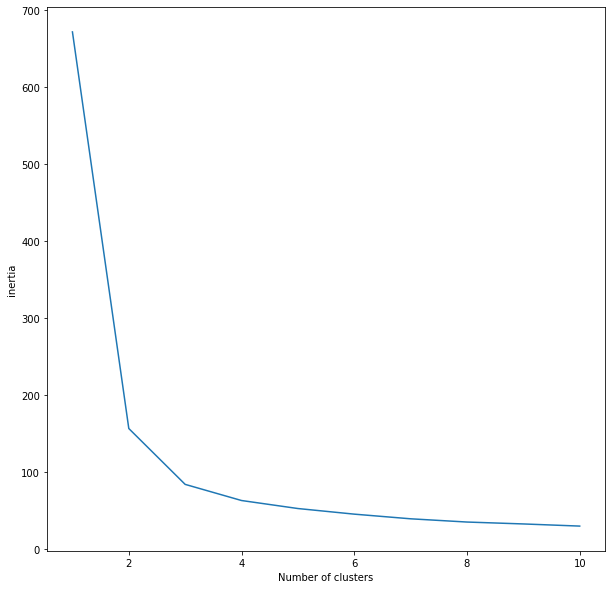

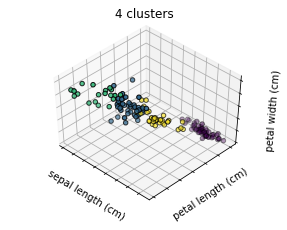

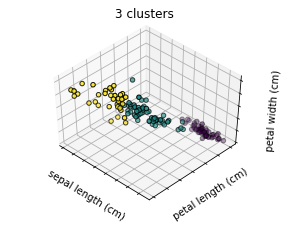

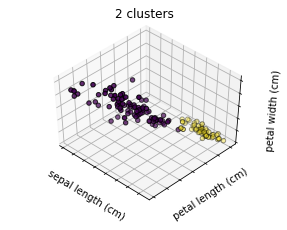

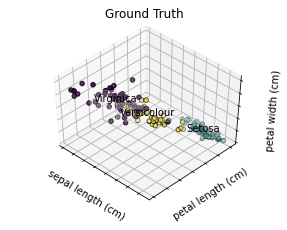

In [10]:
# =============================================================================
# ###Kmeans
# =============================================================================

from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(X)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()


estimators = [('k_means_iris_4', KMeans(n_clusters=4, init = "k-means++")),
              ('k_means_iris_3', KMeans(n_clusters=3, init = "k-means++")),
              ('k_means_iris_2', KMeans(n_clusters=2, init = "k-means++"))]

fignum = 1
titles = ['4 clusters', '3 clusters', '2 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 0], X[:, 2], X[:, 3],
               c=labels.astype(float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[2])
    ax.set_zlabel(feature_names[3])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 2].mean(),
              X[y == label, 3].mean() , name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
yy = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 2], X[:, 3], c=yy, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[2])
ax.set_zlabel(feature_names[3])
ax.set_title('Ground Truth')
ax.dist = 12
fig.show()